In [3]:
import sqlalchemy
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
import dotenv
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import tabulate
import requests
import csv
#import tablib
dotenv.load_dotenv('../.env')

True

In [4]:
#!pip install seaborn

In [5]:
user = os.environ['DB_USERNAME']
pw = os.environ['DB_PASSWORD']
host = os.environ['DB_HOST'] 
db_url = f'postgresql://{user}:{pw}@{host}:5432'
engine = sqlalchemy.create_engine(db_url)

In [6]:
trades = pd.read_sql_table('sudoswap_trades', engine)
trades['block_timestamp'] = pd.to_datetime(trades['block_timestamp'])
#trades.set_index('block_timestamp',inplace=True,drop=False)

In [7]:
trades.head()

,index,block_number,block_timestamp,tx_hash,event_type,platform_address,platform_name,platform_exchange_version,seller_address,buyer_address,nft_address,project_name,erc1155_value,tokenid,token_metadata,currency_symbol,currency_address,price,price_usd,total_fees,platform_fee,creator_fee,total_fees_usd,platform_fee_usd,creator_fee_usd,tx_fee,tx_fee_usd,origin_from_address,origin_to_address,origin_function_signature
0,0,15409146,2022-08-25 12:39:44,0x1e6ff2a5d3a8066718928a0021419ce5d9e51dbb965a...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x8bf8ff1f69e0af66360703a56fb111c99ce180a5,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x8e0f07454850198f089ef10d083601a2a1644656,None,None,940,null,ETH,ETH,0.015135,25.81,0.003031,0.003031,0,5.169735,5.169735,0,0.003780,6.45,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x3efd9e71
1,4,15409141,2022-08-25 12:38:33,0x75f3514458c9a61cfa06731cbb6c6b31cbcf7b9be516...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0xec2a6eb43f5311f265ceb7915ebb54410ff0f60d,0xb5f69b0ffef3ee2744cfb4a3ef51145a7afd751f,0x1ffe11b9fb7f6ff1b153ab8608cf403ecaf9d44a,None,None,6666,null,ETH,ETH,0.001272,2.17,0.000040,0.000040,0,0.068567,0.068567,0,0.001165,1.99,0xb5f69b0ffef3ee2744cfb4a3ef51145a7afd751f,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x11132000
2,5,15409133,2022-08-25 12:37:11,0xb5371a4f365965929e82394048a699c094ba273e8253...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x09bc86499c2db4fae3af9a0054612b35c204223d,0xd26dbeb00a72793784c04cb12e8d92fb58e62f2f,0x8e0f07454850198f089ef10d083601a2a1644656,None,None,4517,null,ETH,ETH,0.014850,25.33,0.002571,0.002571,0,4.384880,4.384880,0,0.003078,5.25,0xd26dbeb00a72793784c04cb12e8d92fb58e62f2f,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x3efd9e71
3,6,15409133,2022-08-25 12:37:11,0x1f7c71452145031d9a134cadcdd4782d552aa13f9a59...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0xc761085d01b65910b74b5cbde7367a89e8169e39,0x8ca3d5547e7cb1bc97d36eb3bee0771b6e9aa724,0xd9d80cb964595b115f2318a999e1090dc3d60e49,None,None,34,null,ETH,ETH,0.012809,21.85,0.000154,0.000154,0,0.262193,0.262193,0,0.001937,3.30,0x8ca3d5547e7cb1bc97d36eb3bee0771b6e9aa724,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x3efd9e71
4,12,15409130,2022-08-25 12:36:49,0x934d09c63b5c4c6730021eb5c0efa15844348d09f065...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x70f3b443aa5f672528dc2ebe618eb9552c5026c5,0xe2b4793a20cb63d708b6ffea432f7462e68aa9ae,0x543d43f390b7d681513045e8a85707438c463d80,None,None,4591,null,ETH,ETH,0.395869,675.18,0.042928,0.042928,0,73.216906,73.216906,0,0.001530,2.61,0xe2b4793a20cb63d708b6ffea432f7462e68aa9ae,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x11132000


In [8]:
trades.nft_address.value_counts()

0x8d94b8ea78a51d783a413c73811511c900c8f365    3747
0xf10a71e53398bf4e3cf5e2a0cad3c529ad19b834    2327
0xca21d4228cdcc68d4e23807e5e370c07577dd152    2038
0xb2df5bde8432c83a8a1919cc610fa9aef5e53348    1379
0xa78c124b4f7368adde6a74d32ed9c369fe016f20    1249
                                              ... 
0x75e9abc7e69fc46177d2f3538c0b92d89054ec91       1
0xadc52dbeef1db8a956f9ce2aac360294e33c19ea       1
0x09c0d2acc2a7de6af2dbd05db3981a9bdfbf64a3       1
0x085d8213b41eac0a6c5533900a15495af68dd358       1
0x09e0df4ae51111ca27d6b85708cfb3f1f7cae982       1
Name: nft_address, Length: 1311, dtype: int64

In [9]:
trades_small = trades[trades.nft_address=='0xa78c124b4f7368adde6a74d32ed9c369fe016f20']
trades_small.tail()

,index,block_number,block_timestamp,tx_hash,event_type,platform_address,platform_name,platform_exchange_version,seller_address,buyer_address,nft_address,project_name,erc1155_value,tokenid,token_metadata,currency_symbol,currency_address,price,price_usd,total_fees,platform_fee,creator_fee,total_fees_usd,platform_fee_usd,creator_fee_usd,tx_fee,tx_fee_usd,origin_from_address,origin_to_address,origin_function_signature
45090,1679,15418660,2022-08-27 01:08:01,0xc12526a835bbc3290733b6ae995ea0adbfd59570cd20...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x626878efa0e2ef2721a38e398d56e29e8c86fcc5,0x18752c86d24dea3226d5df832b2a09f0b1aae0b0,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,486,null,ETH,ETH,0.117355,177.47,0.001162,0.001162,0,1.757146,1.757146,0,0.001284,1.94,0x626878efa0e2ef2721a38e398d56e29e8c86fcc5,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xdabf67d7
45192,1817,15418517,2022-08-27 00:35:48,0xe8d36290411a3d517756187484281a44df5fb01bb76a...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x18752c86d24dea3226d5df832b2a09f0b1aae0b0,0x1adbdbda9d2dca8233c8c8a93cf7bcd834078d2b,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,555,null,ETH,ETH,0.117355,176.97,0.020528,0.020528,0,30.955631,30.955631,0,0.001640,2.47,0x1adbdbda9d2dca8233c8c8a93cf7bcd834078d2b,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x11132000
45487,2540,15418056,2022-08-26 22:43:22,0x817291e0784038ea63ba5014a5466c3314f84c79fb90...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0xf47beb5bfa144d161c517ad332c6fe0178a2a0e1,0x577c4f4b77700b431f02ed76d8637b38d874e570,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,786,null,ETH,ETH,0.337863,525.21,0.115114,0.115114,0,178.944339,178.944339,0,0.016192,25.17,0xf47beb5bfa144d161c517ad332c6fe0178a2a0e1,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x2b997f8e
45503,2587,15417972,2022-08-26 22:24:29,0x0751eed43d2b93a1892d8ba485ecfa460923e94edbb7...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x2048a8f7523ed0b8a00ca06caef8849e596b5f70,0xb0a603f40a74ce54e88ed1c0a73aad3195a828b5,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,682,null,ETH,ETH,0.351999,547.18,0.118113,0.118113,0,183.606538,183.606538,0,0.001831,2.85,0x2048a8f7523ed0b8a00ca06caef8849e596b5f70,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xdabf67d7
45833,3143,15416369,2022-08-26 16:13:41,0x322e40c8fbbbe291a4b6542ede222fcd5815deee4c96...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x50a5d1832a6b4f7208d9b56df536cb4558ded9d2,0x86694972111ed4937346287fde291dbc813dfd2e,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,726,null,ETH,ETH,0.209750,332.43,0.035684,0.035684,0,56.554060,56.554060,0,0.003910,6.20,0x50a5d1832a6b4f7208d9b56df536cb4558ded9d2,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x2b997f8e


In [10]:
# we define 1 wash trade as 2 trades (addressA -> addressB then addressB -> addressA) less than 1h apart

In [11]:
def order_addresses(ad1,ad2):
    first = ad1 if ad1>ad2 else ad2
    second = ad2 if ad1>ad2 else ad1
    return '{}-{}'.format(first,second)

trades_small['pairings'] = trades_small.apply(lambda x: order_addresses(x['buyer_address'],x['seller_address']),axis=1)

C:\Users\gabri\AppData\Local\Temp\ipykernel_3076\84836399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_small['pairings'] = trades_small.apply(lambda x: order_addresses(x['buyer_address'],x['seller_address']),axis=1)


In [12]:
pairing1 = '0x3cb23ccc26a1870eb9e79b7a061907bdaef4f7d6-0x18752c86d24dea3226d5df832b2a09f0b1aae0b0'

In [13]:
trades_small.sort_values(['block_timestamp','pairings'], inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_3076\2650620716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_small.sort_values(['block_timestamp','pairings'], inplace=True)


In [14]:
trades_small[trades_small.pairings==pairing1].block_timestamp.diff()
#trades_small[trades_small.pairings==pairing1].block_timestamp.diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64')
#df["Start Time"].diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64')

35281               NaT
34571   0 days 07:51:29
27825   2 days 20:05:40
27817   0 days 00:01:41
27335   0 days 04:30:47
27194   0 days 03:18:52
27079   0 days 01:57:21
25348   0 days 09:37:12
25291   0 days 00:09:45
23346   0 days 09:13:42
23040   0 days 03:40:16
23023   0 days 00:13:27
22940   0 days 00:52:01
8077    5 days 10:12:17
4109    1 days 17:39:06
Name: block_timestamp, dtype: timedelta64[ns]

In [15]:
groups = trades_small.groupby([pd.Grouper(key='block_timestamp',freq='D'), pd.Grouper(key='pairings')])

In [16]:
# for each group, get diff between
for group in groups:
    pass

In [17]:
list(groups)[4][1][['index']]

,index
35644,89333
35633,89261
35617,89157
35570,88958
35554,88922


In [18]:
print(tabulate.tabulate(list(groups)[4][1][['block_timestamp',
                                            'buyer_address','seller_address','nft_address',
                   'tokenid','price_usd']], headers='keys', tablefmt='simple'))

       block_timestamp      buyer_address                               seller_address                              nft_address                                   tokenid    price_usd
-----  -------------------  ------------------------------------------  ------------------------------------------  ------------------------------------------  ---------  -----------
35644  2022-08-12 01:09:16  0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf  0x1277f5266dead289eb6ab3f97a866f5854feb33d  0xa78c124b4f7368adde6a74d32ed9c369fe016f20         16       512.29
35633  2022-08-12 01:11:53  0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf  0x1277f5266dead289eb6ab3f97a866f5854feb33d  0xa78c124b4f7368adde6a74d32ed9c369fe016f20         59       382.28
35617  2022-08-12 01:18:02  0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf  0x1277f5266dead289eb6ab3f97a866f5854feb33d  0xa78c124b4f7368adde6a74d32ed9c369fe016f20        152       134.5
35570  2022-08-12 01:32:21  0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf  0x1277f5266dea

In [19]:
df_small = list(groups)[4][1]
df_small['block_timestamp_day'] = df_small['block_timestamp'].dt.date

In [20]:
df_small

,index,block_number,block_timestamp,tx_hash,event_type,platform_address,platform_name,platform_exchange_version,seller_address,buyer_address,nft_address,project_name,erc1155_value,tokenid,token_metadata,currency_symbol,currency_address,price,price_usd,total_fees,platform_fee,creator_fee,total_fees_usd,platform_fee_usd,creator_fee_usd,tx_fee,tx_fee_usd,origin_from_address,origin_to_address,origin_function_signature,pairings,block_timestamp_day
35644,89333,15324056,2022-08-12 01:09:16,0xaf1eca35b23bf8dbf21fa2fa6fcc49d9e9e310b8c8ec...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,16,null,ETH,ETH,0.271279,512.29,0.013677,0.013677,0,25.828996,25.828996,0,0.007274,13.74,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xab5c0da2,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12
35633,89261,15324072,2022-08-12 01:11:53,0x20ba0c5bbe5f2675e1a6888510b84af23ea7663e1177...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,59,null,ETH,ETH,0.202433,382.28,0.010206,0.010206,0,19.273994,19.273994,0,0.004481,8.46,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x2b997f8e,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12
35617,89157,15324093,2022-08-12 01:18:02,0x6bbc885c7b774f172e1fd369b0555d80213ce6db15b3...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,152,null,ETH,ETH,0.071225,134.50,0.004913,0.004913,0,9.278124,9.278124,0,0.004911,9.28,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xdabf67d7,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12
35570,88958,15324147,2022-08-12 01:32:21,0xe0ac35971dfcc48e3d97782b0981191572625f7264a3...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,163,null,ETH,ETH,0.081369,153.66,0.008426,0.008426,0,15.911318,15.911318,0,0.005728,10.82,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xdabf67d7,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12
35554,88922,15324177,2022-08-12 01:37:23,0xe104c3898182a622a739a21d71ed3266dc0f7b97e7ef...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,53,null,ETH,ETH,0.100000,188.84,0.009727,0.009727,0,18.368712,18.368712,0,0.003376,6.38,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xab5c0da2,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12


In [21]:
df_small['rank'] = df_small.groupby(['block_timestamp_day','seller_address','buyer_address']).cumcount()
df_small = df_small.sort_values(['rank'])

In [22]:
list(df_small.groupby('rank'))[0][1].head()

,index,block_number,block_timestamp,tx_hash,event_type,platform_address,platform_name,platform_exchange_version,seller_address,buyer_address,nft_address,project_name,erc1155_value,tokenid,token_metadata,currency_symbol,currency_address,price,price_usd,total_fees,platform_fee,creator_fee,total_fees_usd,platform_fee_usd,creator_fee_usd,tx_fee,tx_fee_usd,origin_from_address,origin_to_address,origin_function_signature,pairings,block_timestamp_day,rank
35644,89333,15324056,2022-08-12 01:09:16,0xaf1eca35b23bf8dbf21fa2fa6fcc49d9e9e310b8c8ec...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,16,null,ETH,ETH,0.271279,512.29,0.013677,0.013677,0,25.828996,25.828996,0,0.007274,13.74,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xab5c0da2,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12,0
35554,88922,15324177,2022-08-12 01:37:23,0xe104c3898182a622a739a21d71ed3266dc0f7b97e7ef...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0xa78c124b4f7368adde6a74d32ed9c369fe016f20,None,None,53,null,ETH,ETH,0.100000,188.84,0.009727,0.009727,0,18.368712,18.368712,0,0.003376,6.38,0x1277f5266dead289eb6ab3f97a866f5854feb33d,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xab5c0da2,0x1ee9272d4ff4d15d4aa5527c88dcc670f76aafaf-0x1...,2022-08-12,0


In [23]:
list(df_small.groupby(['rank','nft_address']))[0][1]['block_timestamp'].diff().dropna()

35554   0 days 00:28:07
Name: block_timestamp, dtype: timedelta64[ns]

In [24]:
list(df_small.groupby(['rank','nft_address']))[0][0]

(0, '0xa78c124b4f7368adde6a74d32ed9c369fe016f20')

In [25]:
trades_temp = trades
trades_temp['pairings'] = trades_temp.apply(lambda x: order_addresses(x['buyer_address'],x['seller_address']),axis=1)
trades_temp['block_timestamp_day'] = trades_temp['block_timestamp'].dt.date
trades_temp.sort_values(['block_timestamp','pairings'], inplace=True)
    
trades_temp['rank'] = trades_temp.groupby(['nft_address','block_timestamp_day','seller_address','buyer_address']).cumcount()
trades_temp = trades_temp.sort_values(['rank'])

# iterate over groups, get diff
#list(df_small.groupby(['rank','nft_address']))[0][1]['block_timestamp'].diff().dropna()

In [26]:
diff_df = trades_temp.groupby(['rank','nft_address','pairings','block_timestamp_day'],as_index=False).agg(
    {'block_timestamp': lambda x: x.diff().dropna()})

In [27]:
#diff_df['seconds_elapsed'] = diff_df['block_timestamp'].apply(lambda x: x.total_seconds())

In [28]:
diff_df.head()

,rank,nft_address,pairings,block_timestamp_day,block_timestamp
0,0,0x006dd3008e9f982aedb1ce815d359461e52b9c1c,0xa9a9b8a59001c8e5c947cb371df291ec7d99b324-0x3...,2022-08-20,[]
1,0,0x00758fb0c83a68b6ce4fcf1d2665600f3f0e4570,0xe71b8579ca7b3be1f5fcd20b275997d4b2543268-0x9...,2022-08-26,[]
2,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x0909daf6797f522f7108c3d6e31a3519b59ad2e0-0x0...,2022-08-11,[]
3,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x191db47a3ae4164cb2dd602d6a3adc0bbb01cd20-0x0...,2022-08-11,[]
4,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x271824a5d9edd3a1d2a039f2c3eec50f8d213815-0x0...,2022-08-15,[]


In [29]:
def func1(x):
    try:
        return False if x.size ==0 else True
    except:
        return None

diff_df['signal'] = diff_df['block_timestamp'].apply(func1)
diff_df

,rank,nft_address,pairings,block_timestamp_day,block_timestamp,signal
0,0,0x006dd3008e9f982aedb1ce815d359461e52b9c1c,0xa9a9b8a59001c8e5c947cb371df291ec7d99b324-0x3...,2022-08-20,[],False
1,0,0x00758fb0c83a68b6ce4fcf1d2665600f3f0e4570,0xe71b8579ca7b3be1f5fcd20b275997d4b2543268-0x9...,2022-08-26,[],False
2,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x0909daf6797f522f7108c3d6e31a3519b59ad2e0-0x0...,2022-08-11,[],False
3,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x191db47a3ae4164cb2dd602d6a3adc0bbb01cd20-0x0...,2022-08-11,[],False
4,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0x271824a5d9edd3a1d2a039f2c3eec50f8d213815-0x0...,2022-08-15,[],False
...,...,...,...,...,...,...
43812,84,0x8d94b8ea78a51d783a413c73811511c900c8f365,0xe9df3df6d008ddb218bb2e8da624bebb0374086c-0x5...,2022-08-12,[],False
43813,85,0x8d94b8ea78a51d783a413c73811511c900c8f365,0xe9df3df6d008ddb218bb2e8da624bebb0374086c-0x5...,2022-08-12,[],False
43814,86,0x8d94b8ea78a51d783a413c73811511c900c8f365,0xe9df3df6d008ddb218bb2e8da624bebb0374086c-0x5...,2022-08-12,[],False
43815,87,0x8d94b8ea78a51d783a413c73811511c900c8f365,0xe9df3df6d008ddb218bb2e8da624bebb0374086c-0x5...,2022-08-12,[],False


In [30]:
diff_df_clean = diff_df[diff_df['signal']!=False]

In [31]:
diff_df_clean.head()

,rank,nft_address,pairings,block_timestamp_day,block_timestamp,signal
70,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-16,-1 days +23:44:24,None
166,0,0x03b8d129a8f6dc62a797b59aa5eebb11ad63dada,0xc965dfea7ae237ce170bbac5c659066bc4e1e48b-0x6...,2022-08-10,-1 days +14:36:03,None
172,0,0x03b8d129a8f6dc62a797b59aa5eebb11ad63dada,0xc965dfea7ae237ce170bbac5c659066bc4e1e48b-0xa...,2022-08-20,-1 days +23:57:26,None
235,0,0x06e665ddca4d7fd40cfd2d5e51d3338d1431fccf,0x8168c2530dde00549ec7e7e9c8448fb61e3b8fba-0x7...,2022-08-11,-1 days +23:08:31,None
236,0,0x06e665ddca4d7fd40cfd2d5e51d3338d1431fccf,0xcd69b6793df092763c2ed60174080289a2ae3445-0x7...,2022-08-11,-1 days +22:56:26,None


In [32]:
# wash trading - trades 

In [33]:
diff_df_clean = diff_df_clean.explode('block_timestamp')

In [34]:
diff_df_clean['wash_trade'] = diff_df_clean['block_timestamp'].apply(lambda x: abs(x) <= datetime.timedelta(hours=1))

In [35]:
diff_df_clean[diff_df_clean['wash_trade']].head()

,rank,nft_address,pairings,block_timestamp_day,block_timestamp,signal,wash_trade
70,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-16,-1 days +23:44:24,None,True
172,0,0x03b8d129a8f6dc62a797b59aa5eebb11ad63dada,0xc965dfea7ae237ce170bbac5c659066bc4e1e48b-0xa...,2022-08-20,-1 days +23:57:26,None,True
235,0,0x06e665ddca4d7fd40cfd2d5e51d3338d1431fccf,0x8168c2530dde00549ec7e7e9c8448fb61e3b8fba-0x7...,2022-08-11,-1 days +23:08:31,None,True
456,0,0x10cdcb5a80e888ec9e9154439e86b911f684da7b,0x8f8b4759dc93ca55bd6997df719f20f581f10f5c-0x7...,2022-08-11,-1 days +23:55:33,None,True
592,0,0x134460d32fc66a6d84487c20dcd9fdcf92316017,0x55b17f16cb55c69d20c6adf6aa74d5270ae7aac0-0x0...,2022-08-16,0 days 00:04:04,None,True


In [36]:
examine_nft = '0x00dca92b7fbd0c01f3508756718807836ec82156'
examine_pairings = '0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9b6e8741f86999a5d611e29037c79905fe4d5bdf'
trades_temp[(trades_temp.nft_address==examine_nft) & (trades_temp.pairings == examine_pairings)]

,index,block_number,block_timestamp,tx_hash,event_type,platform_address,platform_name,platform_exchange_version,seller_address,buyer_address,nft_address,project_name,erc1155_value,tokenid,token_metadata,currency_symbol,currency_address,price,price_usd,total_fees,platform_fee,creator_fee,total_fees_usd,platform_fee_usd,creator_fee_usd,tx_fee,tx_fee_usd,origin_from_address,origin_to_address,origin_function_signature,pairings,block_timestamp_day,rank
19226,50269,15357249,2022-08-17 06:57:27,0x421a9bbc4b4a20bf3c88f6082ce03bfca85006784f85...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x9b6e8741f86999a5d611e29037c79905fe4d5bdf,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x00dca92b7fbd0c01f3508756718807836ec82156,None,None,212,null,ETH,ETH,0.008155,15.84,0.000757,0.000757,0,1.470999,1.470999,0,0.001192,2.32,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x11132000,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-17,0
21287,55996,15354847,2022-08-16 21:48:02,0x8494b9809bd7b441f5b1bc7b459e239a8d0f43c2f79b...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x9b6e8741f86999a5d611e29037c79905fe4d5bdf,0x00dca92b7fbd0c01f3508756718807836ec82156,None,None,257,null,ETH,ETH,0.009163,17.22,0.000352,0.000352,0,0.662351,0.662351,0,0.002481,4.66,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0xdabf67d7,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-16,0
21387,56252,15354785,2022-08-16 21:32:26,0x6acc646f0ce28e7c029c1115561946c76aa48e2cbe0b...,sale,0x2b2e8cda09bba9660dca5cb6233787738ad68329,sudoswap,pair router,0x9b6e8741f86999a5d611e29037c79905fe4d5bdf,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x00dca92b7fbd0c01f3508756718807836ec82156,None,None,257,null,ETH,ETH,0.009163,17.22,0.000851,0.000851,0,1.599640,1.599640,0,0.002038,3.83,0xf14319280aa9757e41bf7c3fcd02af8b87009aec,0x2b2e8cda09bba9660dca5cb6233787738ad68329,0x11132000,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-16,0


In [37]:
diff_df_clean[(diff_df_clean.nft_address==examine_nft) & (diff_df_clean.pairings == examine_pairings)]

,rank,nft_address,pairings,block_timestamp_day,block_timestamp,signal,wash_trade
70,0,0x00dca92b7fbd0c01f3508756718807836ec82156,0xf14319280aa9757e41bf7c3fcd02af8b87009aec-0x9...,2022-08-16,-1 days +23:44:24,None,True


In [38]:
diff_df_clean[diff_df_clean['wash_trade']].nft_address.value_counts()[:5]

0xca21d4228cdcc68d4e23807e5e370c07577dd152    127
0xd3d9ddd0cf0a5f0bfb8f7fceae075df687eaebab    119
0xf10a71e53398bf4e3cf5e2a0cad3c529ad19b834     99
0xdbf40a5b96c69327ae871f24ad26b16afc40bb0a     87
0x8d94b8ea78a51d783a413c73811511c900c8f365     78
Name: nft_address, dtype: int64

In [39]:
# plots

In [40]:
washed_nfts = ['0xd3d9ddd0cf0a5f0bfb8f7fceae075df687eaebab','0xca21d4228cdcc68d4e23807e5e370c07577dd152']
plot_df = diff_df_clean[(diff_df_clean['wash_trade']) & 
                        (diff_df_clean['nft_address'].isin(washed_nfts))]

In [41]:
test_plot = plot_df.groupby(['nft_address','block_timestamp_day'],as_index=False)['wash_trade'].count()
test_plot.head()

,nft_address,block_timestamp_day,wash_trade
0,0xca21d4228cdcc68d4e23807e5e370c07577dd152,2022-08-08,5
1,0xca21d4228cdcc68d4e23807e5e370c07577dd152,2022-08-09,2
2,0xca21d4228cdcc68d4e23807e5e370c07577dd152,2022-08-10,5
3,0xca21d4228cdcc68d4e23807e5e370c07577dd152,2022-08-11,3
4,0xca21d4228cdcc68d4e23807e5e370c07577dd152,2022-08-12,6


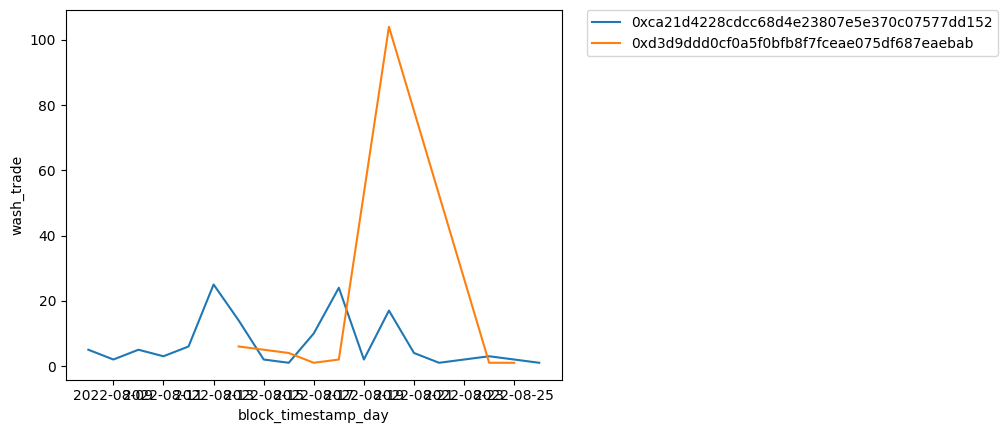

In [42]:
ax = sns.lineplot(x="block_timestamp_day", y="wash_trade", hue="nft_address", data=test_plot)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [44]:
to_display = diff_df_clean[diff_df_clean['wash_trade']].merge(trades[['nft_address','project_name']], on='nft_address')

In [51]:
to_display.groupby(['nft_address','project_name'])['wash_trade'].count().sort_values(ascending=False)

nft_address                                 project_name               
0xca21d4228cdcc68d4e23807e5e370c07577dd152  Zorbs                          258826
0x6c5a06ae6b773457480c12f12c2fb22627507a3a  crudeborne eggs                 15555
0xef1a89cbfabe59397ffda11fc5df293e9bc5db90  based ghouls                    11220
0x5a0121a0a21232ec0d024dab9017314509026480  Finiliar                         9360
0x524cab2ec69124574082676e6f654a18df49a048  LilPudgys                        3626
0xe21ebcd28d37a67757b9bc7b290f4c4928a430b1  the saudis                       3528
0xce6e3a14b5f8ce2b05af0f117dc922769779aa3b  megami                           2784
0x364c828ee171616a39897688a831c2499ad972ec  Sappy Seals                      1320
0x8ff1523091c9517bc328223d50b52ef450200339  ruggenesis nft                    976
0x42f1654b8eeb80c96471451b1106b63d0b1a9fe1  Chubbiverse Frens                 888
0xf497253c2bb7644ebb99e4d9ecc104ae7a79187a  the sevens                        825
0x96be46c50e882dbd373081d0